# Perceptron Multicapa, Caso Practico

In [4]:
import numpy as np 
from sklearn.datasets import load_iris

In [10]:
#Cargamos el conjunto de datos
iris_dataset = load_iris()

In [14]:
#Vamos a ver las etiquetas que tiene el conjunto de datos
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
#Leemos los datos con pandas y lo hacemos un dataframe
import pandas as pd

df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']],
                  columns=iris_dataset['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2 Visualizacion del conjunto de datos

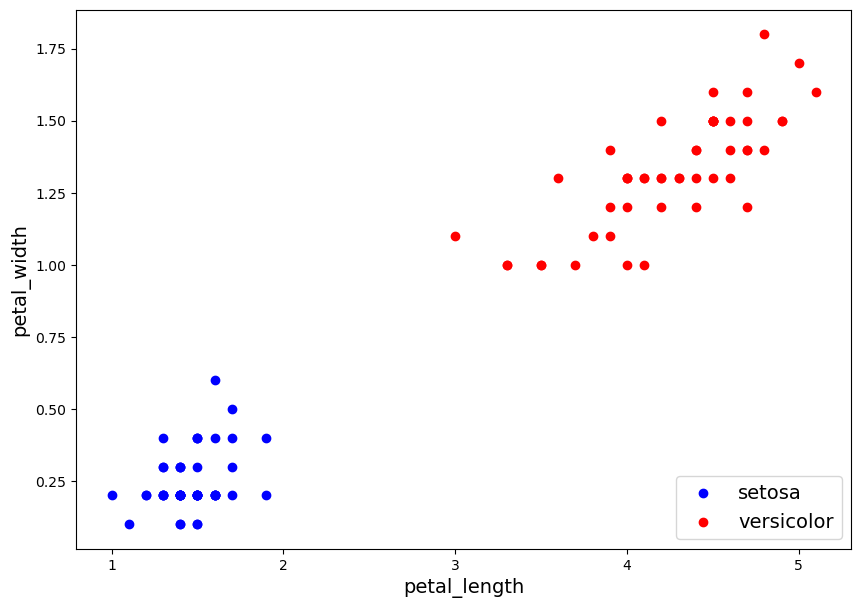

In [26]:
#Representacion grafica en dos dimensiones de los datos

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,7))

plt.scatter(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0], c = "b", label = "setosa")

plt.scatter(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1], c = "r", label = "versicolor")

plt.xlabel("petal_length",fontsize = 14)
plt.ylabel("petal_width",fontsize = 14)
plt.legend(loc = "lower right" , fontsize = 14)
plt.show()

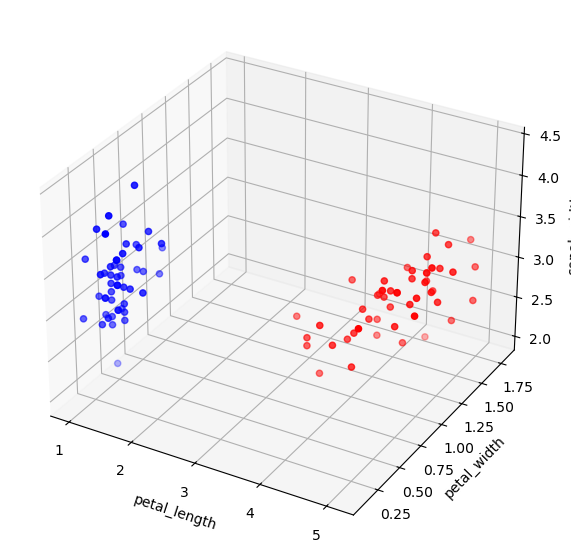

In [32]:
# Representacion grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0], 
            df["petal width (cm)"][df["target"] == 0], 
            df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1], 
            df["petal width (cm)"][df["target"] == 1], 
            df["sepal width (cm)"][df["target"] == 1], c="r")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")


plt.show()

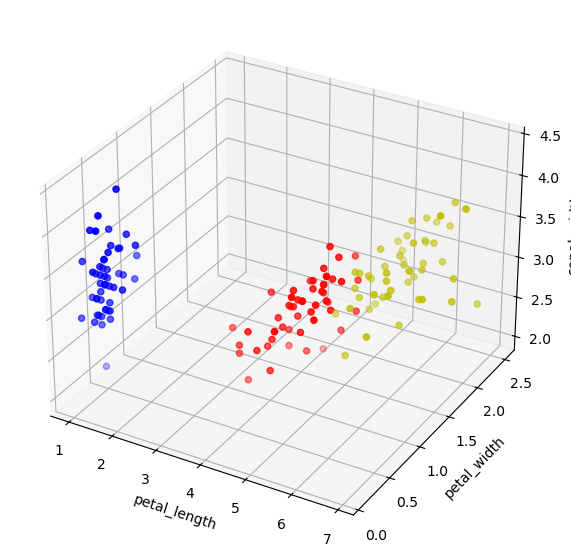

In [37]:
# Representacion grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0], 
            df["petal width (cm)"][df["target"] == 0], 
            df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1], 
            df["petal width (cm)"][df["target"] == 1], 
            df["sepal width (cm)"][df["target"] == 1], c="r")

ax.scatter3D(df["petal length (cm)"][df["target"] == 2], 
            df["petal width (cm)"][df["target"] == 2], 
            df["sepal width (cm)"][df["target"] == 2], c="y")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

## Entrenamiento del algoritmo

In [45]:
#Reducir el conjunto de datos paraentrenar y visualizar

df_reduced = df[["petal length (cm)","petal width (cm)", "target"]]

df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [49]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]] #Caracteristicas de entrada
y_df = df_reduced["target"] #Caracteristicas de salida

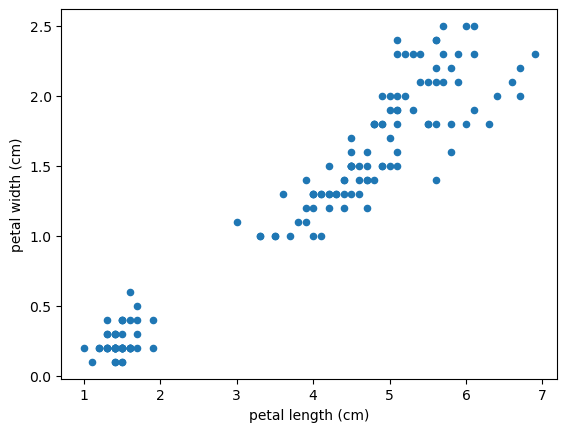

In [54]:
# Visualizamos el conjunto de datos de entrenamiento reducido
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

## Perceptron simple

In [65]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter = 1000, random_state = 40)
clf.fit(X_df, y_df)

Perceptron(random_state=40)

C:\Users\santo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


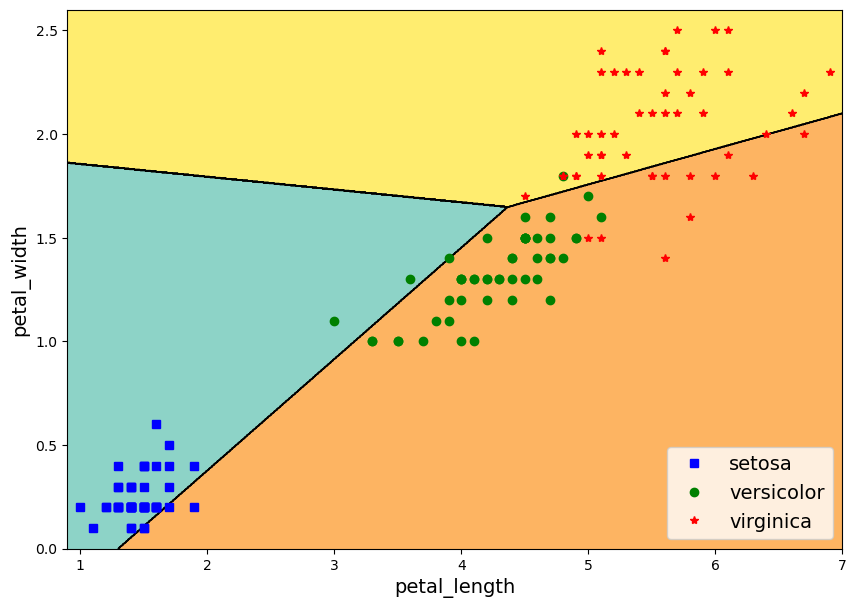

In [69]:
# Representacion grafica del limite de decision
import numpy as np

X = X_df.values

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="versicolor")
plt.plot(X[:, 0][y_df==2], X[:, 1][y_df==2], 'r*', label="virginica")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

In [108]:
from sklearn.neural_network import MLPClassifier

#Clf es por classifier (Clasificador)
clf = MLPClassifier()
clf.fit(X_df, y_df)

C:\Users\santo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [75]:
#Numero de capas del perceptron multicapa
clf.n_layers_

3

In [77]:
clf.hidden_layer_sizes

(100,)

In [79]:
#Como son 3 clases de flores por eso los outputs son 3
clf.n_outputs_

3

In [88]:
#Numero de parametros que forman el modelo
clf.coefs_[0].shape

(2, 100)

In [102]:
clf.intercepts_[1]

array([ 0.23592962, -0.2571063 ,  0.06509092])

In [83]:
X_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


C:\Users\santo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


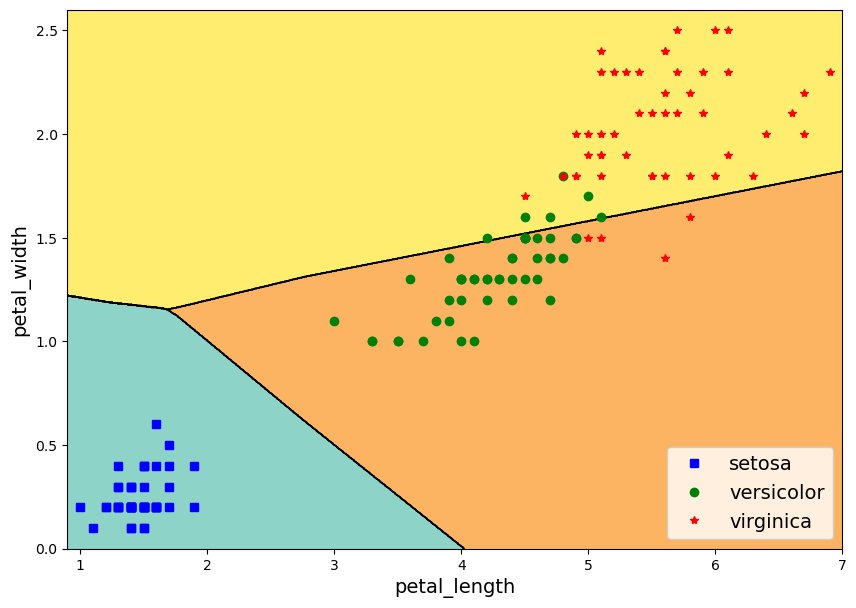

In [110]:
# Representacion grafica del limite de decision
import numpy as np

X = X_df.values

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="versicolor")
plt.plot(X[:, 0][y_df==2], X[:, 1][y_df==2], 'r*', label="virginica")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()